# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import requests
import numpy as np

import api_keys
from citipy import citipy

## Generate Cities List

In [74]:
city_df = pd.DataFrame()
city_df['city'] = ''

lat_range = np.random.uniform(low=-90.000, high=90.000, size=1500)
long_range = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_range

for index in range(len(lat_range)):
    city_df.loc[index, 'city'] = citipy.nearest_city(lat_range[index],long_range[index]).city_name



city_df = city_df.drop_duplicates('city',keep='last').reset_index(drop=True)

city_df['Lat'] = 'NaN'
city_df['Lng'] = 'NaN'
city_df['Max Temp']	= 'NaN'
city_df['Humidity']	= 'NaN'
city_df['Cloudiness'] = 'NaN'
city_df['Wind Speed']= 'NaN'
city_df['Date']= 'NaN'

city_df

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,ambon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mount gambier,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,winslow,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,birao,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,salinopolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
626,nouadhibou,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,half moon bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,butaritari,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,east london,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
test_city = city_df['city'].iloc[0]
def query_url(city):
    weather_key = api_keys.weather_api_key
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    units = 'imperial'
    query_url = f'{url}appid={weather_key}&units={units}&q={city}'

    return query_url

In [76]:
def generate_df(df,index,response):
    df.loc[index, 'Lat'] = response['coord']['lat']
    df.loc[index, 'Lng'] = response['coord']['lon']
    df.loc[index,'Country'] = response["sys"]["country"]
    df.loc[index,'Max Temp']= response['main']['temp_max']
    df.loc[index, 'Humidity'] = response['main']['humidity']
    df.loc[index, 'Cloudiness'] = response['clouds']['all']
    df.loc[index, 'Wind Speed'] = response['wind']['speed']
    df.loc[index, 'Date'] = response['dt']

set_index = 0
set_num = 1
for index, row in city_df.iterrows():
    city_name = row['city']
    query = query_url(city_name)
    try:
        response = requests.get(query).json()
        generate_df(city_df,index,response)
        if set_index == 50:
            set_num += 1
            set_index = 0
        else:
            set_index += 1
        print(f'Processing Record {set_index} of Set {set_num} : {city_name}')
    except(KeyError,IndexError):
        city_df.drop([index])
        print('City not Found. Skipping...')

Processing Record 1 of Set 1 : ambon
Processing Record 2 of Set 1 : mount gambier
Processing Record 3 of Set 1 : winslow
Processing Record 4 of Set 1 : birao
Processing Record 5 of Set 1 : salinopolis
Processing Record 6 of Set 1 : burns lake
Processing Record 7 of Set 1 : cockburn town
Processing Record 8 of Set 1 : abu kamal
Processing Record 9 of Set 1 : beloha
Processing Record 10 of Set 1 : bogorodskoye
Processing Record 11 of Set 1 : pingdu
Processing Record 12 of Set 1 : taiobeiras
City not Found. Skipping...
City not Found. Skipping...
Processing Record 13 of Set 1 : puerto leguizamo
Processing Record 14 of Set 1 : krasnoselkup
Processing Record 15 of Set 1 : itacare
Processing Record 16 of Set 1 : darhan
Processing Record 17 of Set 1 : zarate
Processing Record 18 of Set 1 : emilio carranza
Processing Record 19 of Set 1 : lusambo
Processing Record 20 of Set 1 : popondetta
Processing Record 21 of Set 1 : ust-tsilma
City not Found. Skipping...
City not Found. Skipping...
Processi

In [77]:
# create checkpoint with dataframe
df = city_df.copy()
df

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,ambon,-3.6954,128.1814,87.94,70,40,6.91,1627441533,ID
1,mount gambier,-37.8333,140.7667,46.31,87,75,29.93,1627440769,AU
2,winslow,35.0242,-110.6974,80.78,45,40,1.01,1627441372,US
3,birao,10.2849,22.7882,69.66,96,100,5.5,1627441533,CF
4,salinopolis,-0.6136,-47.3561,79.23,80,92,9.86,1627441534,BR
...,...,...,...,...,...,...,...,...,...
626,nouadhibou,20.931,-17.0347,68.13,91,16,24.61,1627441385,MR
627,half moon bay,37.4636,-122.4286,81.72,74,20,17.27,1627441518,US
628,butaritari,3.0707,172.7902,81.66,72,100,4.5,1627441662,KI
629,east london,-33.0153,27.9116,63.9,80,0,12.73,1627441662,ZA


In [79]:
df = df.dropna()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
df_humidity = df.loc[df['Humidity'] < 100]

In [82]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df_humidity 

In [83]:
clean_city_data.to_csv('Data/Cities_clean.csv',index = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [84]:
df = pd.read_csv('Data/cities_clean.csv')
df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,ambon,-3.6954,128.1814,87.94,70,40,6.91,1627441533,ID
1,mount gambier,-37.8333,140.7667,46.31,87,75,29.93,1627440769,AU
2,winslow,35.0242,-110.6974,80.78,45,40,1.01,1627441372,US
3,birao,10.2849,22.7882,69.66,96,100,5.50,1627441533,CF
4,salinopolis,-0.6136,-47.3561,79.23,80,92,9.86,1627441534,BR


In [85]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Temperature vs Latitude')

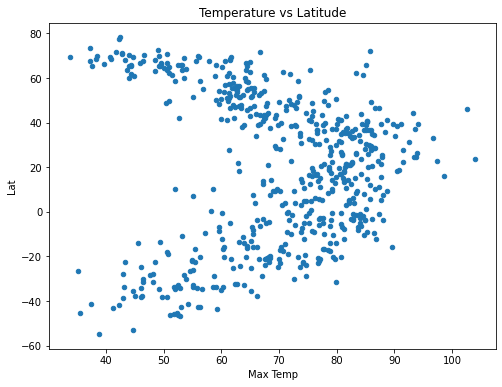

In [86]:
df.plot.scatter(x = 'Max Temp', y = 'Lat', figsize = (8,6))
plt.title('Temperature vs Latitude')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity vs Latitude')

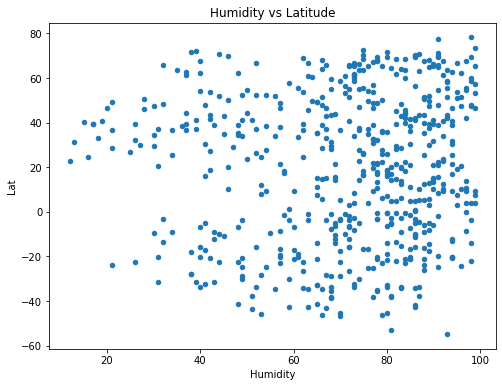

In [87]:
df.plot.scatter(x = 'Humidity', y = 'Lat', figsize = (8,6))
plt.title('Humidity vs Latitude')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness vs Latitude')

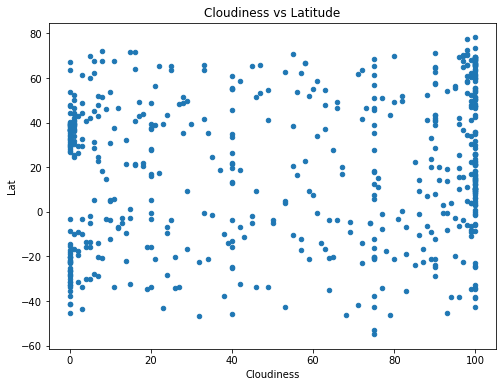

In [88]:
df.plot.scatter(x = 'Cloudiness', y = 'Lat', figsize = (8,6))
plt.title('Cloudiness vs Latitude')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'WInd Speed vs Latitude')

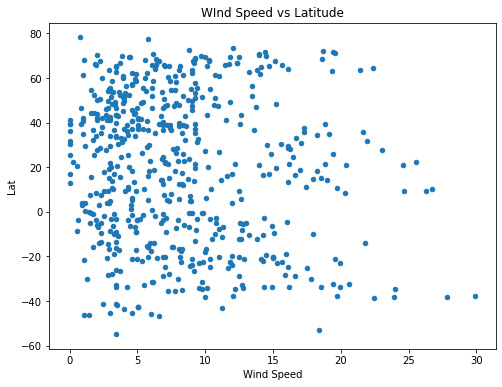

In [89]:
df.plot.scatter(x = 'Wind Speed', y = 'Lat', figsize = (8,6))
plt.title('WInd Speed vs Latitude')

## Linear Regression

In [90]:
from scipy.stats import linregress

# Define the hemispheres

north_hem_df = df.loc[df['Lat'] > 0 ]
south_hem_df = df.loc[df['Lat'] < 0 ]

def linear_regression_hemisphere(hemisphere,x_column,y_column):
    hemisphere.plot.scatter(x=x_column, y = y_column, figsize = (8,6))
    x_value = hemisphere[x_column]
    y_value = hemisphere[y_column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {slope.round(2)} * x_value + {intercept.round(2)}"
    print(line_eq)
    plt.plot(x_value, regress_value, 'r', color = 'blue')
    plt.title('Regression: temperature vs. latitude (north hemisphere)')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.45 * x_value + 88.5


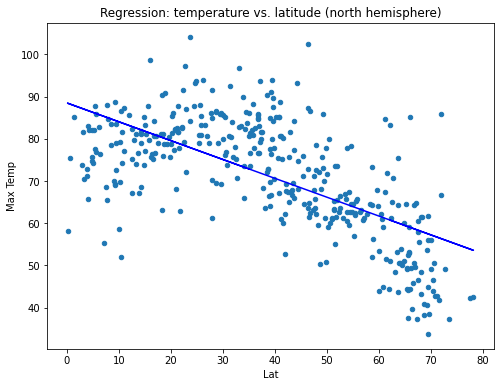

In [91]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.71 * x_value + 79.71


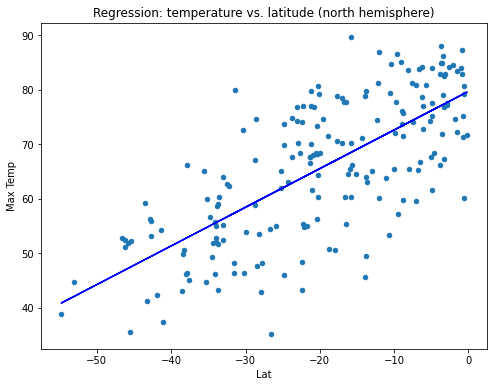

In [92]:
linear_regression_hemisphere(south_hem_df, 'Lat', 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.04 * x_value + 73.5


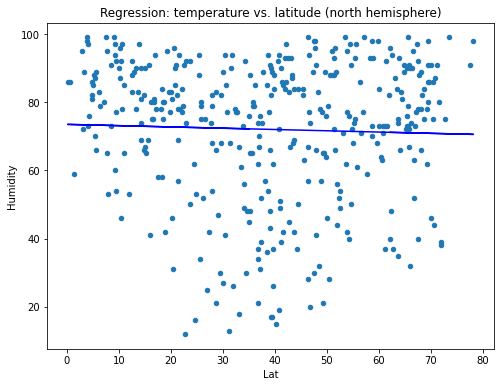

In [93]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.13 * x_value + 71.85


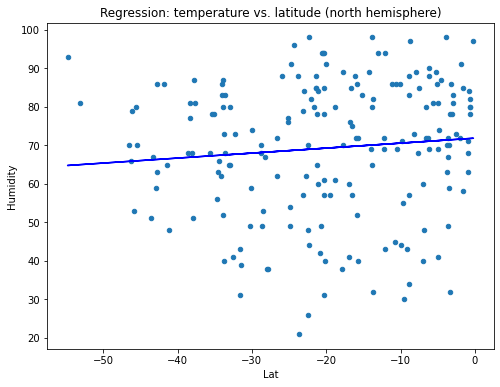

In [94]:
linear_regression_hemisphere(south_hem_df, 'Lat', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.0 * x_value + 58.61


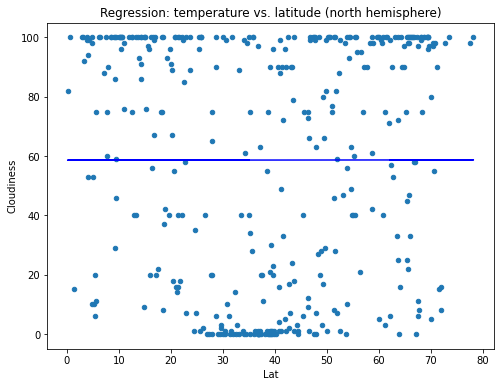

In [95]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.23 * x_value + 49.7


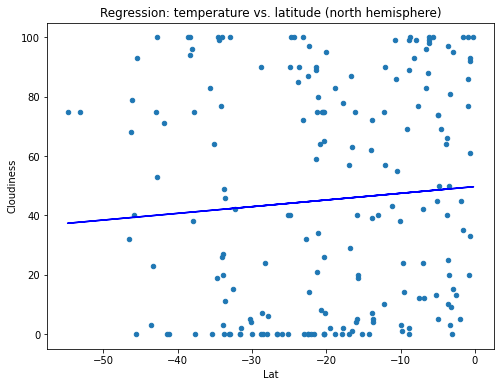

In [96]:
linear_regression_hemisphere(south_hem_df, 'Lat', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.0 * x_value + 7.71


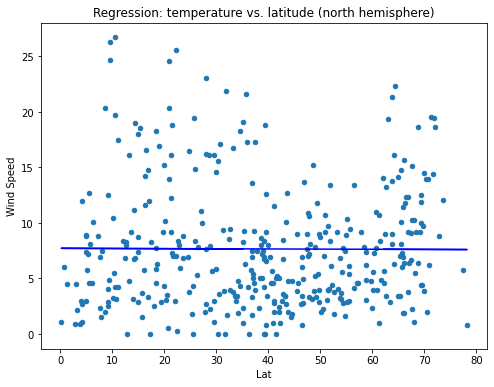

In [97]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.0 * x_value + 7.71


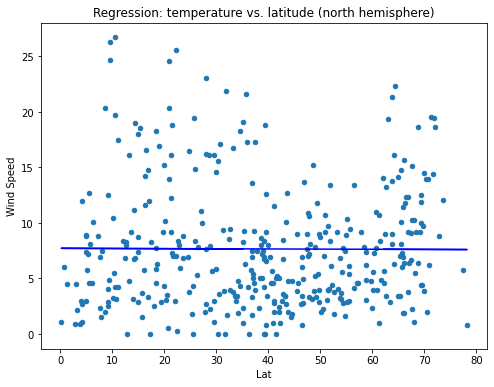

In [98]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Wind Speed')